# **1. Data Exploration**
## The Objectives Of The Following Code :
1. Understand the problem. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
2.   Univariable study. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.
3. Multivariate study. We'll try to understand how the dependent variable and independent variables relate.
4. Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.
5. Test assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.



In [1]:
from google.colab import files

# Upload files interactively
uploaded = files.upload()

Saving train.csv to train.csv


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings('ignore')
%matplotlib inline

# Read the file
df = pd.read_csv("train.csv")
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### **Please take a look at the data description file!**



In [4]:
df[['SalePrice']].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


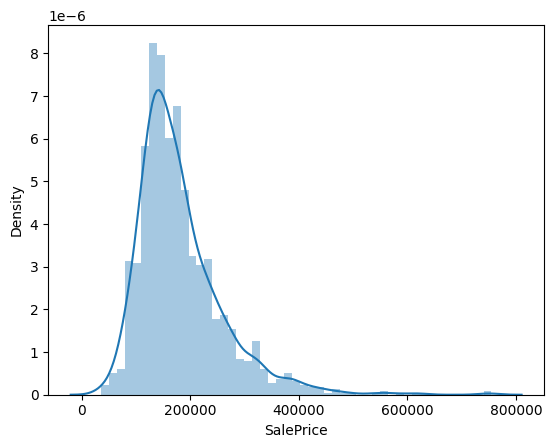

In [5]:
sns.distplot(df['SalePrice']);

In [6]:
#skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


* Skewness (1.882876): The data is positively skewed, meaning it has a long right tail. This indicates higher values (outliers) are pulling the distribution to the right.

* Kurtosis (6.536282): The distribution is leptokurtic, meaning it has a sharp peak and heavy tails. This suggests more extreme values (outliers) than a normal distribution.

## Excellent! Let's Move to Understanding of the relationships between the different features!


* We will perform a heatmap to visualize the correlation matrix of our dataset. This will help us understand the relationships between different numerical features, particularly how they correlate with the target variable, SalePrice. By identifying strong positive or negative correlations, we can gain insights into which features are most influential for our model and potentially remove redundant features that are highly correlated with each other. This step is crucial for efficient feature selection and improving model performance.

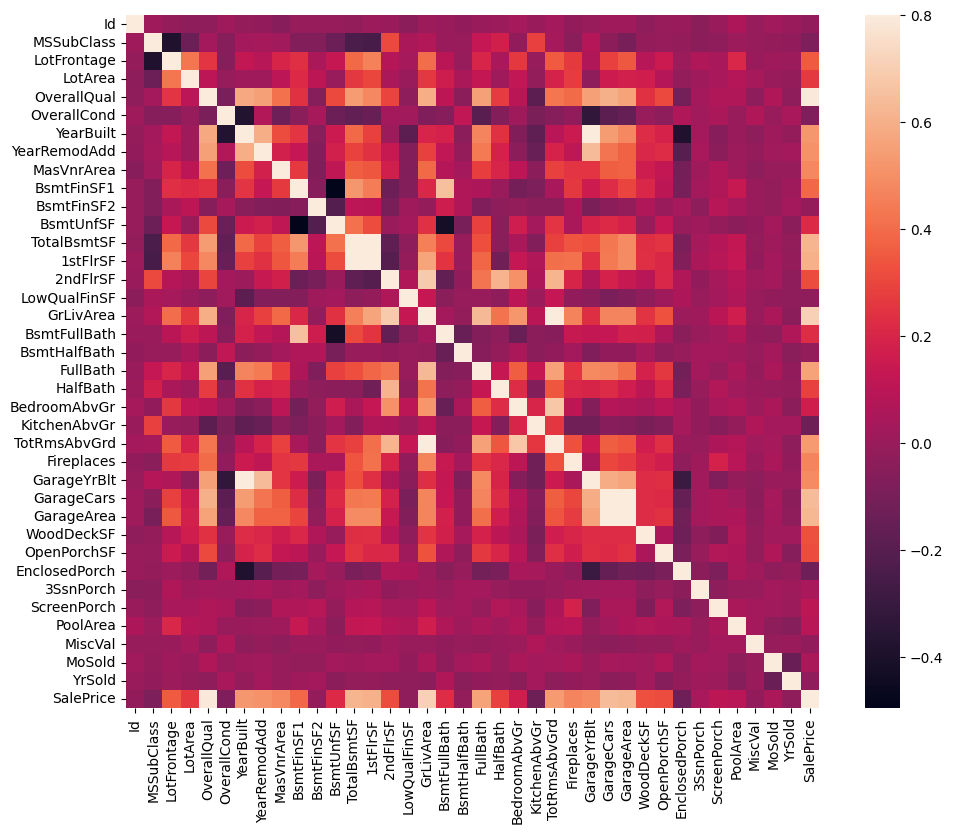

In [7]:
#correlation matrix
corrmat = df.select_dtypes(include=np.number).corr() # Select only numerical features
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

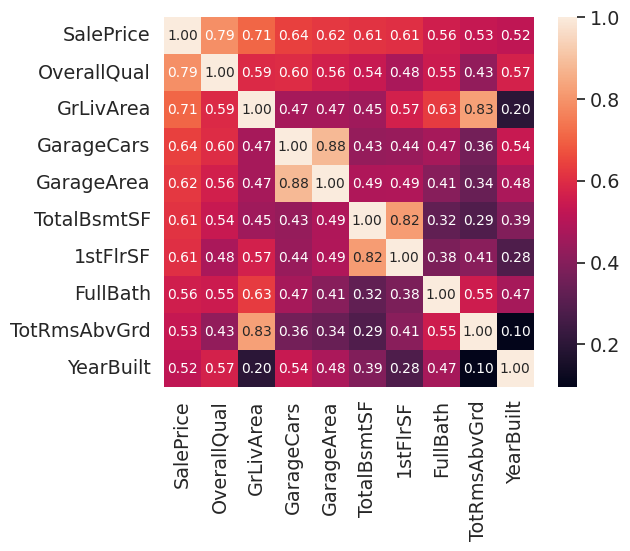

In [8]:
# Number of top variables to display
k = 10

# Select the top 10 most correlated features with 'SalePrice'
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

# Calculate correlation matrix for the selected columns
cm = np.corrcoef(df[cols].values.T)

# Increase font scale for better readability
sns.set(font_scale=1.25)

# Create the heatmap
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols.values,
                 xticklabels=cols.values)

# Show the plot
plt.show()

**-> The strongest predictors of SalePrice are 'OverallQual', 'GrLivArea', and 'TotalBsmtSF'. 'GarageCars' should be kept over 'GarageArea' due to higher correlation, and 'TotalBsmtSF' is preferred over '1stFloor'. 'FullBath' and 'TotRmsAbvGrd' are less useful**

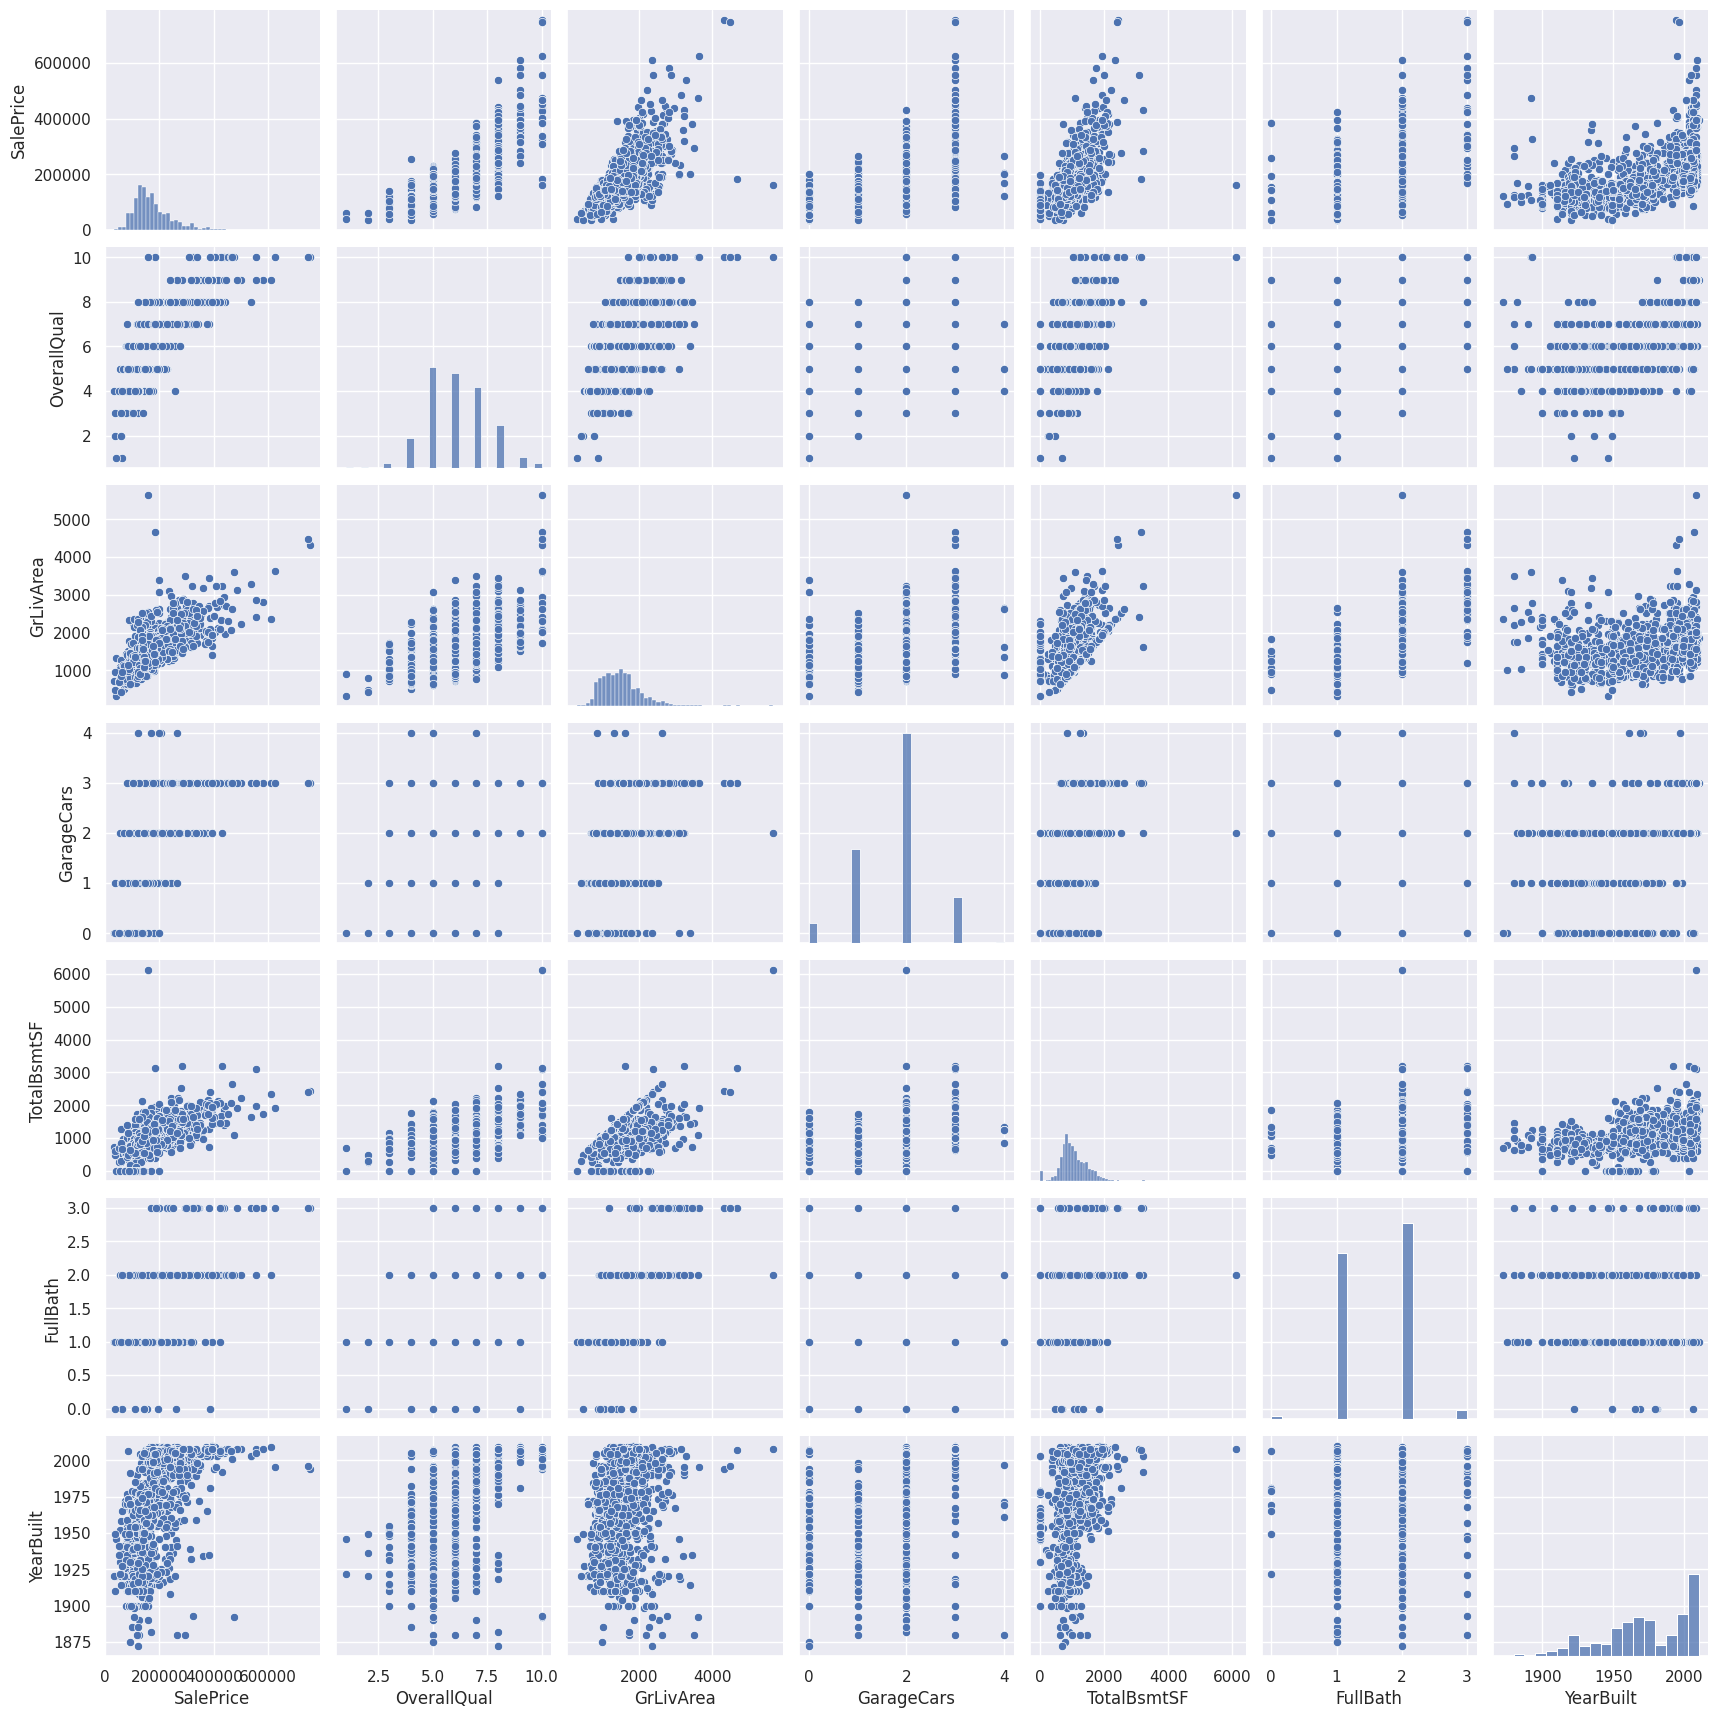

In [9]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();

## -> Let's move forward to what's missing: missing data!

Important questions when thinking about missing data:

* How prevalent is the missing data?
* Is missing data random or does it have a pattern?

In [10]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


- We will remove the columns with missing values rate greater than 15% (The reason behind this elimination is that probably these features do not really represent main aspects when searching for a new house)
- GarageX and BsmtY have the same proportions of missing variables(Assumption: the missing values belongs to the same observations)
-> I will be deleting these features since GarageCars have no missing observations and it should be eneough to study the relationship between Price And Garage Features
- The same Logic applies to Bsmt features

In [11]:
#Dealing with missing values
df_train = df.copy()

# Check columns in missing_data
print(missing_data[missing_data['Total'] > 1].index)

# Drop columns with missing values if they exist
df_train = df_train.drop(columns=(missing_data[missing_data['Total'] > 1]).index, axis=1)

# Remove rows where 'Electrical' is missing
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

# Check for any remaining missing values
df_train.isnull().sum().max()

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
       'LotFrontage', 'GarageYrBlt', 'GarageCond', 'GarageType',
       'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure',
       'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea'],
      dtype='object')


0

## **What About Outliers?**

In [13]:
##standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'].to_numpy()[:, np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


In [17]:
#deleting points
indices_to_remove = df_train.nlargest(2, 'GrLivArea').index
df_train = df_train.drop(indices_to_remove)

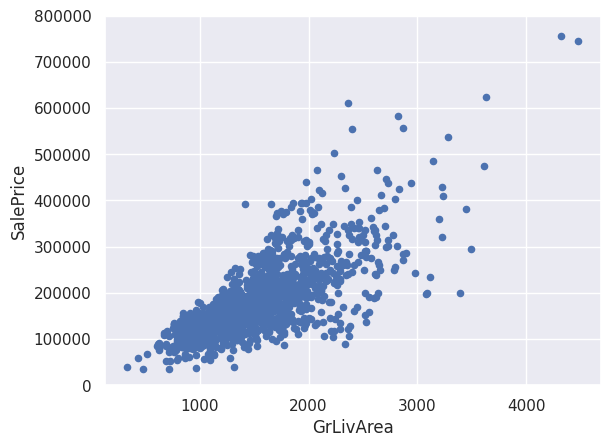

In [18]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

- There seem to be no outliers

We should Test 4 assumptions:
- Normality
- Homoscddasticity (equal levels of variances across all independent vbs)
- Linearity(If not linear we can consoder several transformations)
- Absence of correlated errors


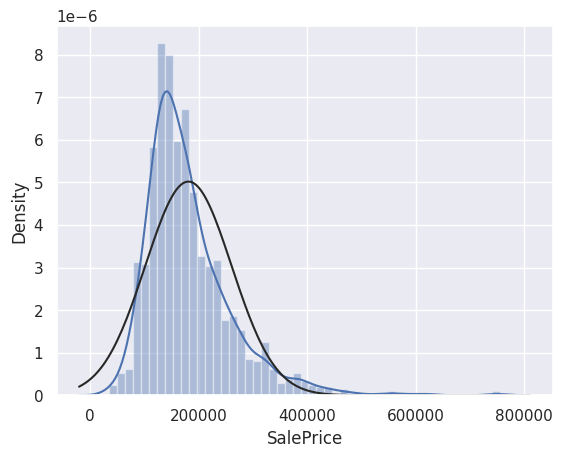

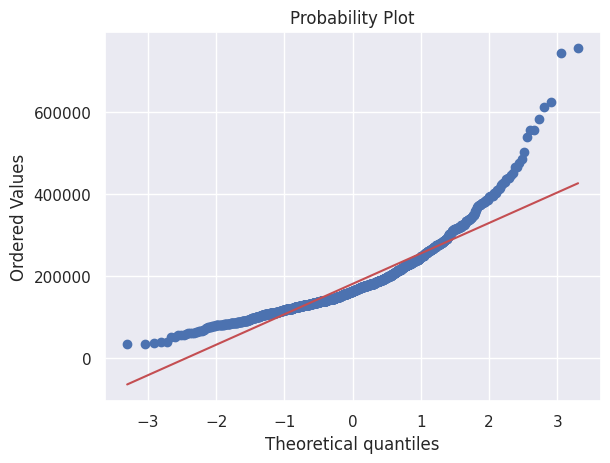

In [20]:
#Normality
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [21]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

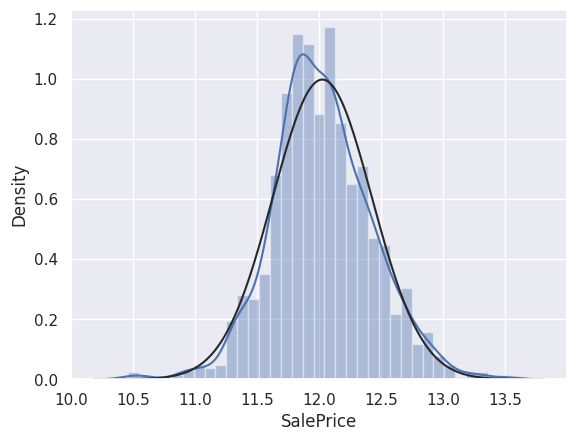

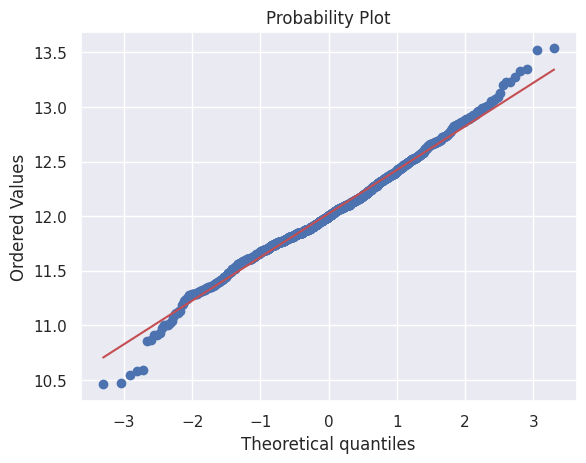

In [22]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

- The same can be applied on features
- For features with high number of 0 observations we can split the data and extract the observations with non-zero values and then perform the log transformations

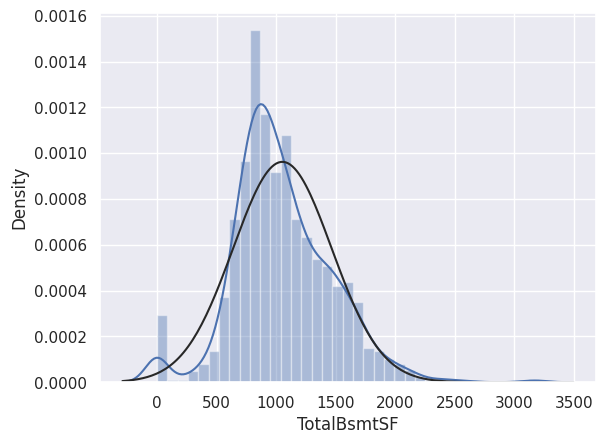

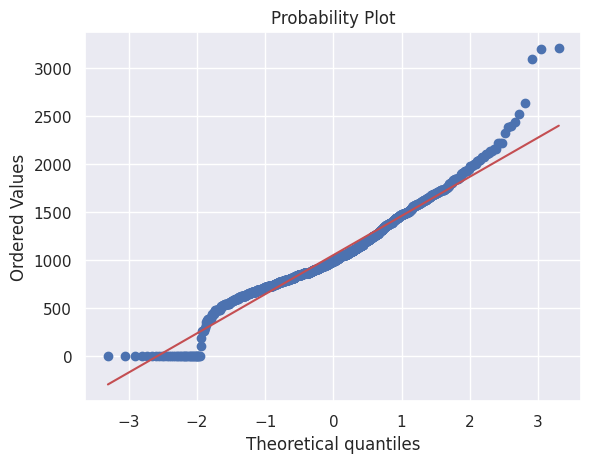

In [23]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)


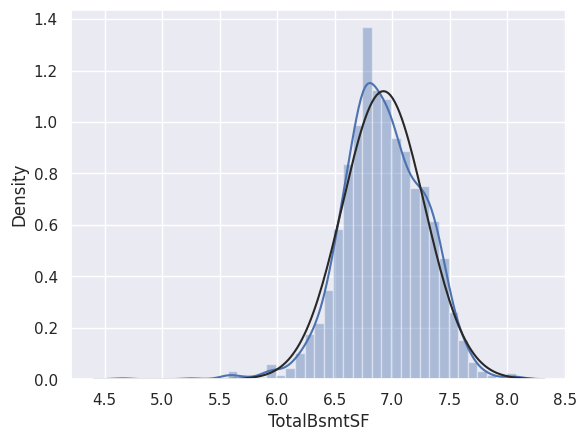

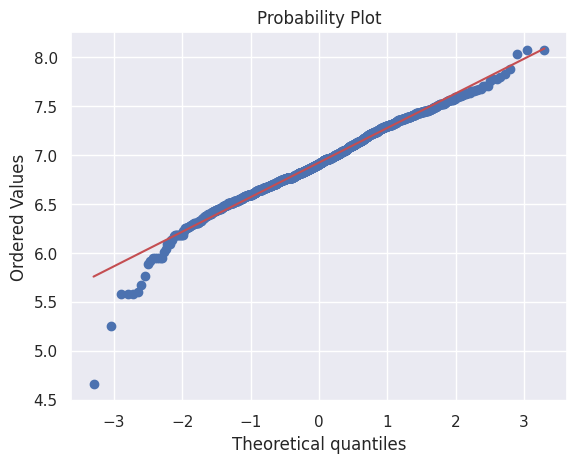

In [25]:
# Create a new binary column based on the condition
df_train['HasBsmt'] = (df_train['TotalBsmtSF'] > 0).astype(int)
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)


In [26]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)

**Conclusion:** We philosophied about the variables, we analysed 'SalePrice' alone and with the most correlated variables, we dealt with missing data and outliers, we tested some of the fundamental statistical assumptions and we even transformed categorial variables into dummy variables.

2. Linear regression

In [29]:
X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.016921689988755227
R-squared: 0.9024760719002471


- Mean Squared Error (MSE): At ~0.017, it indicates a low average squared error between predicted and actual values, suggesting accurate predictions.
- R-squared (R²): At ~0.902, it means the model explains 90.2% of the variance in the target variable, reflecting a strong fit to the data.